In [3]:
import numpy as np
import pandas as pd 

In [4]:
!pip install bar_chart_race

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for bar_chart_race from https://files.pythonhosted.org/packages/09/01/f6d1a1a0978b39560843c54be7349804d7d2faef0a869acd7c8a6fc920b0/bar_chart_race-0.1.0-py3-none-any.whl.metadata
Using cached bar_chart_race-0.1.0-py3-none-any.whl (156 kB)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
sns.set_context('notebook')
import datetime
import requests
import warnings
from IPython.display import HTML
import bar_chart_race as bcr
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'bar_chart_race'

In [6]:
ageGroup=pd.read_csv('AgeGroupDetails.csv')
covid19_india=pd.read_csv('covid_19_india.csv')
hospital_beds=pd.read_csv('HospitalBedsIndia.csv')
icmrtest_lab=pd.read_csv('ICMRTestingLabs.csv')
indiDetails=pd.read_csv('IndividualDetails.csv')
india_cesnus=pd.read_csv('population_india_census2011.csv')
state_details=pd.read_csv('StatewiseTestingDetails.csv')

# Timeline for the Global spread of COVID 19

In [7]:
corona_data=pd.read_csv('covid_19_data.csv')

In [8]:
corona_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
85633,85634,08/12/2020,Zaporizhia Oblast,Ukraine,2020-08-13 04:29:15,971.0,22.0,680.0
85634,85635,08/12/2020,Zeeland,Netherlands,2020-08-13 04:29:15,950.0,69.0,0.0
85635,85636,08/12/2020,Zhejiang,Mainland China,2020-08-13 04:29:15,1275.0,1.0,1268.0
85636,85637,08/12/2020,Zhytomyr Oblast,Ukraine,2020-08-13 04:29:15,2215.0,48.0,1574.0


In [ ]:
choro_map=px.choropleth(corona_data, locations="Country/Region", locationmode="country names", color="Confirmed",
                       hover_name="Country/Region", animation_frame="ObservationDate")
choro_map.update_layout(
    title_text='Global Spread of Coronavirus',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    ))
choro_map.show()

# COVID 19 IN INDIA

In [9]:
covid19_india=pd.read_csv('covid_19_india.csv',index_col='Date')

In [10]:
covid19_india

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
30/01/20,1,6:00 PM,Kerala,1,0,0,0,1
31/01/20,2,6:00 PM,Kerala,1,0,0,0,1
01/02/20,3,6:00 PM,Kerala,2,0,0,0,2
02/02/20,4,6:00 PM,Kerala,3,0,0,0,3
03/02/20,5,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
18/08/20,5332,8:00 AM,Telengana,-,-,72202,711,93937
18/08/20,5333,8:00 AM,Tripura,-,-,5404,62,7409
18/08/20,5334,8:00 AM,Uttarakhand,-,-,8485,158,12493


In [11]:
df_cases=covid19_india.loc[:,['State/UnionTerritory','Confirmed']]

In [12]:
df_cases

,State/UnionTerritory,Confirmed
Date,,
30/01/20,Kerala,1
31/01/20,Kerala,1
01/02/20,Kerala,2
02/02/20,Kerala,3
03/02/20,Kerala,3
...,...,...
18/08/20,Telengana,93937
18/08/20,Tripura,7409
18/08/20,Uttarakhand,12493


In [13]:
df_cases.reset_index(inplace=True)

In [14]:
df_cases

,Date,State/UnionTerritory,Confirmed
0,30/01/20,Kerala,1
1,31/01/20,Kerala,1
2,01/02/20,Kerala,2
3,02/02/20,Kerala,3
4,03/02/20,Kerala,3
...,...,...,...
5331,18/08/20,Telengana,93937
5332,18/08/20,Tripura,7409
5333,18/08/20,Uttarakhand,12493
5334,18/08/20,Uttar Pradesh,158216


In [15]:
df_cases['Date']=pd.to_datetime(df_cases['Date'],format="%d/%m/%y")

In [16]:
df_confirmed_deaths_cured=covid19_india.loc[:, ['State/UnionTerritory','Confirmed','Deaths','Cured']]
df_confirmed_deaths_cured.index=pd.to_datetime(df_confirmed_deaths_cured.index,format="%d/%m/%y")
df_confirmed_deaths_cured.tail()

,State/UnionTerritory,Confirmed,Deaths,Cured
Date,,,,
2020-08-18,Telengana,93937,711,72202
2020-08-18,Tripura,7409,62,5404
2020-08-18,Uttarakhand,12493,158,8485
2020-08-18,Uttar Pradesh,158216,2515,104808
2020-08-18,West Bengal,119578,2473,89703


In [17]:
df1=df_confirmed_deaths_cured.reset_index()

In [18]:
df1=df1.groupby('Date').sum()
df1.reset_index(inplace=True)
df2=df1.tail(25)

In [19]:
df2

,Date,Confirmed,Deaths,Cured
177,2020-07-25,1336861,31358,849432
178,2020-07-26,1385522,32063,885577
179,2020-07-27,1435453,32771,917568
180,2020-07-28,1483156,33425,952743
181,2020-07-29,1531669,34193,988029
182,2020-07-30,1583792,34968,1020582
183,2020-07-31,1638870,35747,1057805
184,2020-08-01,1695988,36511,1094374
185,2020-08-02,1750723,37364,1145629
186,2020-08-03,1803695,38135,1186203


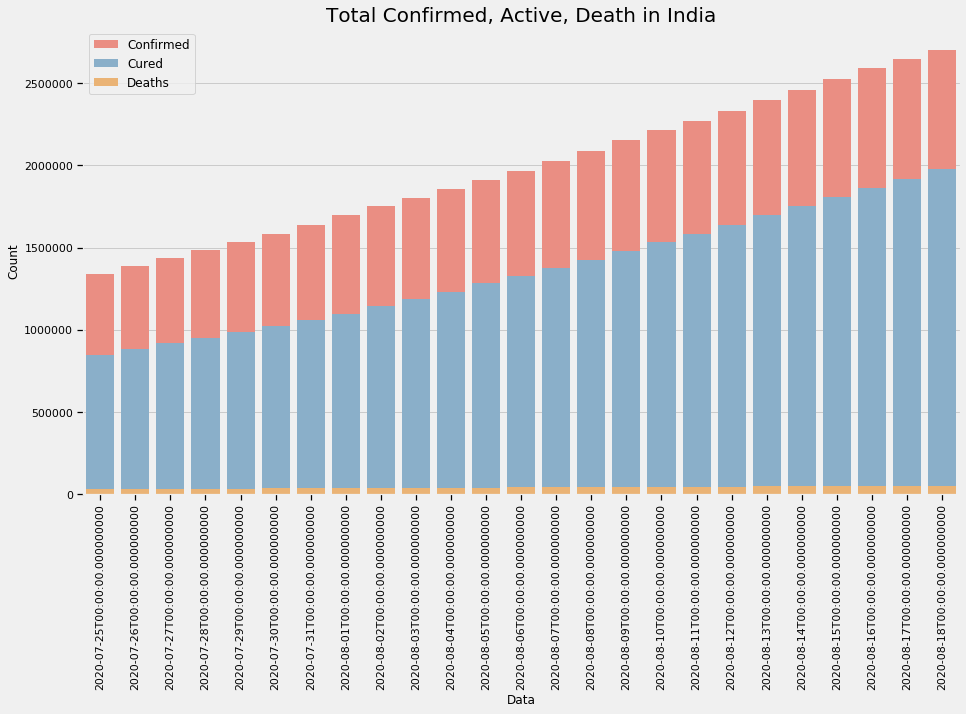

In [20]:
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Data')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12)

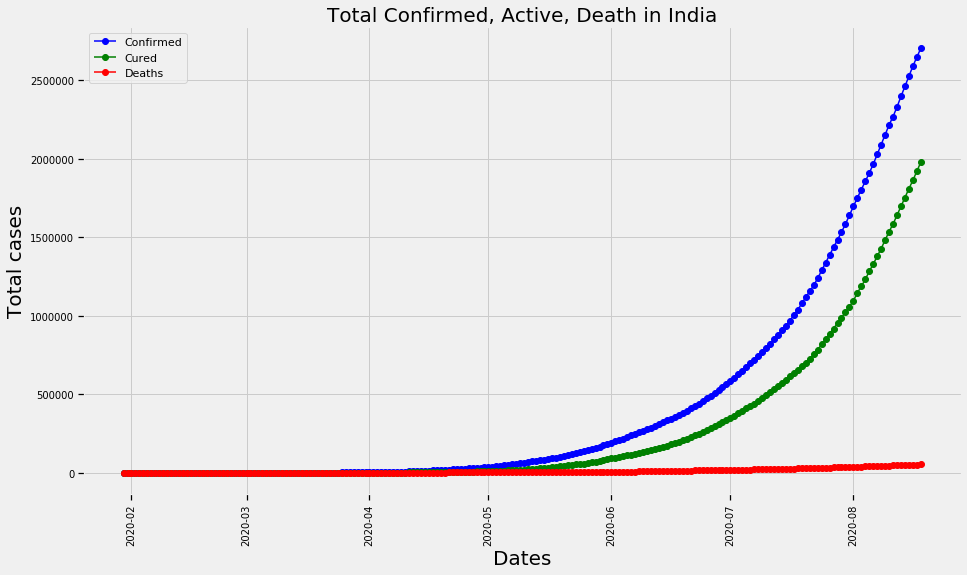

In [21]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Dates',fontsize=20)
plt.ylabel("Total cases",fontsize=20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
ax1=plt.plot_date(data=df1,y='Confirmed',x='Date',label='Confirmed',linestyle='-',color='b')
ax2=plt.plot_date(data=df1, y='Cured',x='Date',label='Cured',linestyle='-',color='g')
ax3=plt.plot_date(data=df1,y='Deaths',x='Date',label='Deaths',linestyle='-',color='r')
plt.legend()

# Statewise Death Rate and Cure Rate

In [33]:
state_cases=df_confirmed_deaths_cured.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active']=state_cases['Confirmed']- abs((state_cases['Deaths']- state_cases['Cured']))
state_cases['Cure Rate (per 100)']=np.round(100*state_cases['Cured']/state_cases['Confirmed'],2)
state_cases['Mortality Rate (per 100)']=np.round(100*state_cases['Deaths']/state_cases['Confirmed'],2)

state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Mortality Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])


,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Cure Rate (per 100),Mortality Rate (per 100)
22,Maharashtra,604358,20265,428514,196109,70.900000,3.350000
32,Tamil Nadu,343945,5886,283937,65894,82.550000,1.710000
1,Andhra Pradesh,296609,2732,209100,90241,70.500000,0.920000
18,Karnataka,233283,4062,148562,88783,63.680000,1.740000
39,Uttar Pradesh,158216,2515,104808,55923,66.240000,1.590000
11,Delhi,153367,4214,138301,19280,90.180000,2.750000
41,West Bengal,119578,2473,89703,32348,75.020000,2.070000
4,Bihar,106307,468,76452,30323,71.920000,0.440000
35,Telengana,93937,711,72202,22446,76.860000,0.760000
13,Gujarat,79710,2800,62595,19915,78.530000,3.510000


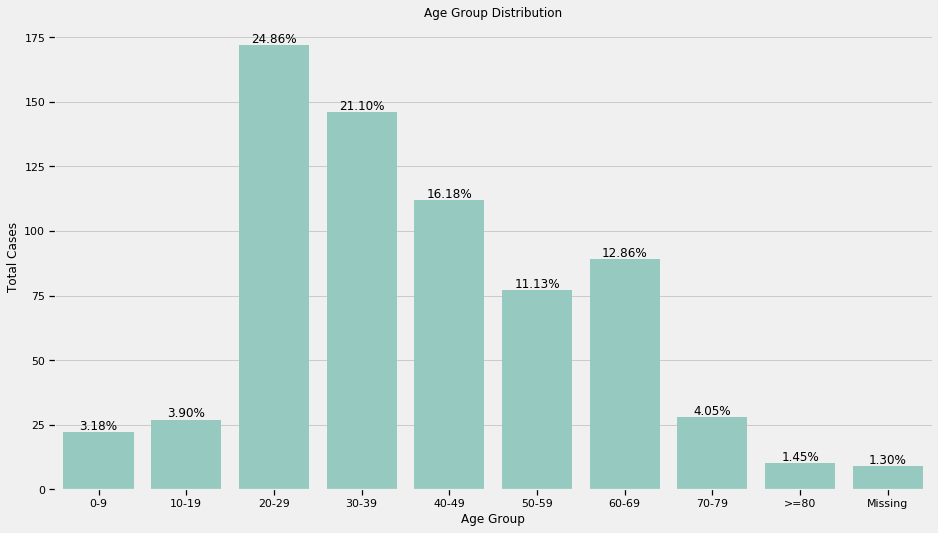

In [23]:
plt.figure(figsize=(14,8))
sns.barplot(data=ageGroup,x='AgeGroup',y='TotalCases',color=sns.color_palette('Set3')[0])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
for i in range(ageGroup.shape[0]):
    count = ageGroup.iloc[i]['TotalCases']
    plt.text(i,count+1,ageGroup.iloc[i]['Percentage'],ha='center')
    
from IPython.display import display, Markdown

In [43]:
covid19_india_map=pd.read_csv('covid_19_india.csv')

In [45]:
covid19_india_map

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
5331,5332,18/08/20,8:00 AM,Telengana,-,-,72202,711,93937
5332,5333,18/08/20,8:00 AM,Tripura,-,-,5404,62,7409
5333,5334,18/08/20,8:00 AM,Uttarakhand,-,-,8485,158,12493
5334,5335,18/08/20,8:00 AM,Uttar Pradesh,-,-,104808,2515,158216


# India COVID-19 Timeline

In [47]:
choro_map=px.choropleth(covid19_india_map, locations="State/UnionTerritory", locationmode="India", color="Confirmed",
                       hover_name="State/UnionTerritory", animation_frame="Date")
choro_map.update_layout(
    title_text='Global Spread of Coronavirus',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    ))
choro_map.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'India'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']